## T Brain Competition  ~ LOAD MODULE

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
from collections import Counter
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
#from pandas.tools.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
#import xgboost
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import os
print( os.path.abspath("main.ipynb"))

/home/jovyan/Tbrain/main.ipynb


## LOAD DATA

In [3]:
import os

print(os.listdir('./'))

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

print('size of train data',train.shape)
print('size of test data',test.shape)

['.ipynb_checkpoints', 'main.ipynb', 'train.csv', 'test.csv']
size of train data (1521787, 23)
size of test data (421665, 22)


In [4]:
train.isna().sum(axis=0).sort_values(ascending = False).head()

flbmk        12581
flg_3dsmk    12581
txkey            0
fraud_ind        0
bacno            0
dtype: int64

In [5]:
test.isna().sum(axis=0).sort_values(ascending = False).head()

flbmk        3715
flg_3dsmk    3715
txkey           0
stscd           0
bacno           0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

## Train Data Label Encoding Object to float

In [7]:
train['ecfg'].unique()

array(['N', 'Y'], dtype=object)

In [8]:
le.fit(train['ecfg'].unique())

LabelEncoder()

In [9]:
train['ecfg']=le.transform(train['ecfg'])

In [10]:
train['insfg'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
le.fit(train['insfg'].unique())

LabelEncoder()

In [12]:
train['insfg']=le.transform(train['insfg'])

In [13]:
train['flbmk'].unique()

array(['N', 'Y', nan], dtype=object)

In [14]:
train.flbmk = train.flbmk.fillna("O")

In [15]:
le.fit(train['flbmk'].unique())

LabelEncoder()

In [16]:
train['flbmk']=le.transform(train['flbmk'])

In [17]:
train['flg_3dsmk'].unique()

array(['N', 'Y', nan], dtype=object)

In [18]:
train.flg_3dsmk = train.flg_3dsmk.fillna("O")

In [19]:
le.fit(train['flg_3dsmk'].unique())

LabelEncoder()

In [20]:
train['flg_3dsmk']=le.transform(train['flg_3dsmk'])

In [21]:
train['ovrlt'].unique()

array(['N', 'Y'], dtype=object)

In [22]:
#train.flg_3dsmk = train.flg_3dsmk.fillna("")

In [23]:
le.fit(train['ovrlt'].unique())

LabelEncoder()

In [24]:
train['ovrlt']=le.transform(train['ovrlt'])

## Test Data Label Encoding Object to float

In [25]:
test['ecfg'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
le.fit(test['ecfg'].unique())

LabelEncoder()

In [27]:
test['ecfg']=le.transform(test['ecfg'])

In [28]:
test['insfg'].unique()

array(['N', 'Y'], dtype=object)

In [29]:
le.fit(test['insfg'].unique())

LabelEncoder()

In [30]:
test['insfg']=le.transform(test['insfg'])

In [31]:
test['flbmk'].unique()

array(['N', nan, 'Y'], dtype=object)

In [32]:
test.flbmk = test.flbmk.fillna("O")

In [33]:
le.fit(test['flbmk'].unique())

LabelEncoder()

In [34]:
test['flbmk']=le.transform(test['flbmk'])

In [35]:
test['flg_3dsmk'].unique()

array(['N', 'Y', nan], dtype=object)

In [36]:
test.flg_3dsmk = test.flg_3dsmk.fillna("O")

In [37]:
le.fit(test['flg_3dsmk'].unique())

LabelEncoder()

In [38]:
test['flg_3dsmk']=le.transform(test['flg_3dsmk'])

In [39]:
test['ovrlt'].unique()

array(['N', 'Y'], dtype=object)

In [40]:
#train.flg_3dsmk = train.flg_3dsmk.fillna("")

In [41]:
le.fit(test['ovrlt'].unique())

LabelEncoder()

In [42]:
test['ovrlt']=le.transform(test['ovrlt'])

In [43]:
train.head(10)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0,0,...,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0,0,...,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0,0,...,0,6,152458.0,457,59333,0,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,0,5,0,0,...,0,5,172946.0,247,50436,0,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,0,4,0,0,...,0,6,182129.0,263,93775,0,5817,102,0,1051004
5,0,78377,2295,465.62,5,0,0,2,0,0,...,0,6,104918.0,451,0,0,5817,102,0,2943
6,6411,94435,49219,1806.49,3,62,0,4,0,0,...,0,6,172624.0,339,0,0,5865,102,0,1622153
7,6769,112032,177989,526.88,6,62,0,2,0,0,...,0,7,34933.0,373,79200,0,5817,102,0,57795
8,6092,92294,85535,201.39,2,62,0,2,0,0,...,0,6,64652.0,264,8335,0,3585,102,0,836165
9,0,16279,110755,465.62,5,0,0,2,0,0,...,0,10,104447.0,451,0,0,5817,102,0,4507


In [44]:
test.head(10)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,215328.0,457,59360,0,0,102,0,592489
1,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,222007.0,457,59360,0,0,102,0,592452
2,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,100,170013.0,457,59360,0,0,102,0,590212
3,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,100,165914.0,457,59360,0,0,102,0,590209
4,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,215311.0,457,59360,0,0,102,0,592488
5,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,222541.0,457,59360,0,0,102,2,592460
6,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,100,162903.0,457,59360,0,0,102,0,590160
7,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,222022.0,457,59360,0,0,102,0,592453
8,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,95,182629.0,457,59360,0,0,102,0,585745
9,6881,163188,116799,513.8,5,0,0,0,0,0,...,0,102,221853.0,457,59360,0,0,102,0,592451


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null int64
etymd        1521787 non-null int64
flbmk        1521787 non-null int64
flg_3dsmk    1521787 non-null int64
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null int64
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null int64
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(21)
memory usage: 267.0 MB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421665 entries, 0 to 421664
Data columns (total 22 columns):
acqic        421665 non-null int64
bacno        421665 non-null int64
cano         421665 non-null int64
conam        421665 non-null float64
contp        421665 non-null int64
csmcu        421665 non-null int64
ecfg         421665 non-null int64
etymd        421665 non-null int64
flbmk        421665 non-null int64
flg_3dsmk    421665 non-null int64
hcefg        421665 non-null int64
insfg        421665 non-null int64
iterm        421665 non-null int64
locdt        421665 non-null int64
loctm        421665 non-null float64
mcc          421665 non-null int64
mchno        421665 non-null int64
ovrlt        421665 non-null int64
scity        421665 non-null int64
stocn        421665 non-null int64
stscd        421665 non-null int64
txkey        421665 non-null int64
dtypes: float64(2), int64(20)
memory usage: 70.8 MB


# Data Clean

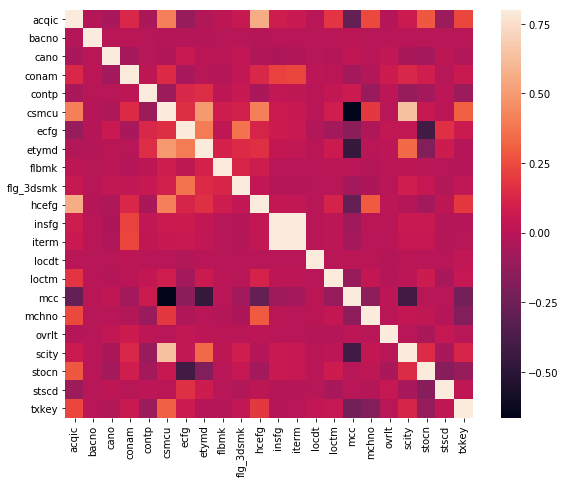

In [54]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10, 7.5))
sns.heatmap(corrmat, vmax=.8, square=True)

In [58]:
train.isnull().sum() #計算空值

acqic        0
bacno        0
cano         0
conam        0
contp        0
csmcu        0
ecfg         0
etymd        0
flbmk        0
flg_3dsmk    0
hcefg        0
insfg        0
iterm        0
locdt        0
loctm        0
mcc          0
mchno        0
ovrlt        0
scity        0
stocn        0
stscd        0
txkey        0
dtype: int64

In [59]:
test.isnull().sum() #計算空值

acqic        0
bacno        0
cano         0
conam        0
contp        0
csmcu        0
ecfg         0
etymd        0
flbmk        0
flg_3dsmk    0
hcefg        0
insfg        0
iterm        0
locdt        0
loctm        0
mcc          0
mchno        0
ovrlt        0
scity        0
stocn        0
stscd        0
txkey        0
dtype: int64

## Train & Predict

In [47]:
y = train['fraud_ind']
train.drop('fraud_ind', axis = 1, inplace = True)

In [48]:
feature = [col for col in train.columns if col not in ['txkey']] #移除fraud_ind & txkey
print(feature)

['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd', 'flbmk', 'flg_3dsmk', 'hcefg', 'insfg', 'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd']


In [60]:
X_train = train[feature]
X_test = test[feature]
etc = ensemble.ExtraTreesClassifier(n_estimators=200, max_depth=30, min_samples_split=3,min_samples_leaf=2, 
                                    max_features=19, random_state=10,bootstrap=True, oob_score=True,
                                   )  
etc.fit(X_train, y)
sub = pd.DataFrame({"txkey": test['txkey'],"fraud_ind": etc.predict(X_test)})
sub.to_csv("submission.csv", index=False) 
print (etc.oob_score_)

0.9941187564356904


## XGBOOST

In [50]:
from xgboost import XGBClassifier 
xgb=XGBClassifier(oob_score=True)

In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421665 entries, 0 to 421664
Data columns (total 21 columns):
acqic        421665 non-null int64
bacno        421665 non-null int64
cano         421665 non-null int64
conam        421665 non-null float64
contp        421665 non-null int64
csmcu        421665 non-null int64
ecfg         421665 non-null int64
etymd        421665 non-null int64
flbmk        421665 non-null int64
flg_3dsmk    421665 non-null int64
hcefg        421665 non-null int64
insfg        421665 non-null int64
iterm        421665 non-null int64
locdt        421665 non-null int64
loctm        421665 non-null float64
mcc          421665 non-null int64
mchno        421665 non-null int64
ovrlt        421665 non-null int64
scity        421665 non-null int64
stocn        421665 non-null int64
stscd        421665 non-null int64
dtypes: float64(2), int64(19)
memory usage: 67.6 MB


In [52]:
X_train = train[feature]
X_test = test[feature]
xgb.fit(X_train, y)
sub = pd.DataFrame({"txkey": test['txkey'],"fraud_ind": xgb.predict(X_test)})
sub.to_csv("submission_XGB.csv", index=False)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## RandomForest

In [55]:
RFC = RandomForestClassifier(oob_score=True)
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [56]:
X_train = train[feature]
X_test = test[feature]
x = X_train
RFC.fit(x, y)
print (RFC.oob_score_)

sub = pd.DataFrame({"txkey": test['txkey'],"fraud_ind": RFC.predict(X_test)})
sub.to_csv("submission_RFC.csv", index=False)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9932605548608314


In [61]:
RFC2 = RandomForestClassifier(n_estimators= 100, max_depth=230, min_samples_split=2,
                                  min_samples_leaf=2,max_features=10 ,oob_score=True, random_state=10)

X_train = train[feature]
X_test = test[feature]
x = X_train
RFC2.fit(x, y)
sub = pd.DataFrame({"txkey": test['txkey'],"fraud_ind": RFC2.predict(X_test)})
sub.to_csv("submission_RFC2.csv", index=False)
print (RFC2.oob_score_)

0.9944742595382928
